### bert分词

In [2]:
from transformers import BertTokenizer, BertModel

path = './bert-base-uncased/'

tokenizer_bert = BertTokenizer.from_pretrained(path)
text = "伊朗再打以色列"
print(tokenizer_bert.tokenize(text))
print(tokenizer_bert(text))

['伊', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]']
{'input_ids': [101, 1762, 100, 100, 100, 100, 100, 100, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


### OpenAI tiktoken 分词

In [25]:
import tiktoken
enc = tiktoken.get_encoding("cl100k_base")
text = '伊朗再打以色列'
res = enc.encode(text)
print(res)
b1 = [enc.decode_single_token_bytes(i) for i in res]
b2 = [i.encode('utf-8') for i in text]
[enc.decode([i]) for i in res]
b1, b2

[17885, 232, 4916, 245, 88356, 76537, 23897, 39135, 32218]


([b'\xe4\xbc',
  b'\x8a',
  b'\xe6\x9c',
  b'\x97',
  b'\xe5\x86\x8d',
  b'\xe6\x89\x93',
  b'\xe4\xbb\xa5',
  b'\xe8\x89\xb2',
  b'\xe5\x88\x97'],
 [b'\xe4\xbc\x8a',
  b'\xe6\x9c\x97',
  b'\xe5\x86\x8d',
  b'\xe6\x89\x93',
  b'\xe4\xbb\xa5',
  b'\xe8\x89\xb2',
  b'\xe5\x88\x97'])

### ChatGLM分词

In [20]:
from transformers import AutoTokenizer
path = './chatglm2-6b/'
tokenizer_glm = AutoTokenizer.from_pretrained(path,trust_remote_code=True)
text = '伊朗再打以色列'
print(tokenizer_glm.tokenize(text))
print(tokenizer_glm(text))

['▁', '伊朗', '再', '打', '以色列']
{'input_ids': [64790, 64792, 30910, 36372, 54860, 54819, 36415], 'attention_mask': [1, 1, 1, 1, 1, 1, 1], 'position_ids': [0, 1, 2, 3, 4, 5, 6]}


## OpenAI官方分词工具
https://platform.openai.com/tokenizer  

### Embedding

In [26]:
import torch
embedding = torch.nn.Embedding(1000,64)
t1 = torch.tensor(999)#代表一个token,
embedding(t1).shape

torch.Size([64])

$$
PE_{(pos,2i)} = sin(pos/10000^{\frac{2i}{d_{model}}})
$$
$$
PE_{(pos,2i+1)} = cos(pos/10000^{\frac{2i}{d_{model}}})
$$

### GELU


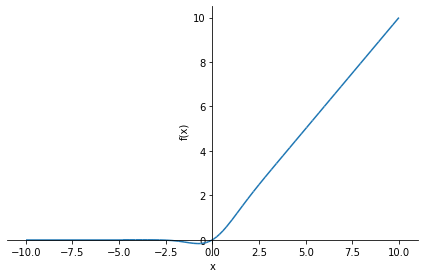

In [18]:
import sympy
x = sympy.symbols('x')
gelu =  0.5 * x * (1.0 + sympy.tanh(sympy.sqrt(2.0 / sympy.pi) * (x + 0.044715 * x**3)))
sympy.plot(gelu)

### 带T的softmax

In [7]:
import torch
t = torch.tensor([1.0,0.5,2.3,0.09])
y1 = torch.nn.functional.softmax(t)
y2 = torch.nn.functional.softmax(t/0.5)
y3 = torch.nn.functional.softmax(t/2)
y1,y2,y3

<ipython-input-7-683882d1f293>:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y1 = torch.nn.functional.softmax(t)
<ipython-input-7-683882d1f293>:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y2 = torch.nn.functional.softmax(t/0.5)
<ipython-input-7-683882d1f293>:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y3 = torch.nn.functional.softmax(t/2)


(tensor([0.1761, 0.1068, 0.6462, 0.0709]),
 tensor([0.0667, 0.0245, 0.8980, 0.0108]),
 tensor([0.2310, 0.1799, 0.4425, 0.1466]))